# Importing Modules


In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3


# Setze die maximale Anzahl der anzuzeigenden Zeilen
pd.set_option('display.max_rows', 100)  # Beispiel: Zeige bis zu 100 Zeilen

# Setze die maximale Anzahl der anzuzeigenden Spalten
pd.set_option('display.max_columns', 50)  # Beispiel: Zeige bis zu 50 Spalten

# Für eine breitere Darstellung jeder Zeile (um das Abschneiden von Daten zu vermeiden)
pd.set_option('display.max_colwidth', None)  # Oder verwenden Sie eine spezifische Zahl

# Reading Dataset


In [163]:
df_online_shop = pd.read_csv('Online Shop Customer Sales Data.csv')

In [164]:
df_online_shop.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


# Analysing Dataset


In [165]:
df_online_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


#  Data 🗂️


# Customer_id: 
 An identifier for each customer, stored as an integer. Each customer has a unique ID number.
-
# Age: 
  The age of the customer, represented as an integer. It indicates the age of each customer.
-------------------------------------------------------------------------------
# Gender:
 Represents the gender of the customer. It's stored as an integer, possibly denoting different genders (e.g., 0 for male, 1 for female, or other numeric representations).
 # 0 might represent one gender category (often interpreted as male).
# 1 might represent another gender category (often interpreted as female).
--------------------------------------------------------------------------------
# Revenue_Total:
 Total revenue generated by each customer. It is stored as a floating-point number (decimal number).
--------------------------------------------------------------------------------

# N_Purchases:
 Number of purchases made by each customer. It is an integer value, counting the total number of purchases.
--------------------------------------------------------------------------------

# Purchase_DATE:
 The date of the purchase. It is stored as an object or string data type, which might require further processing or conversion to a date/time format for analysis.
--------------------------------------------------------------------------------

# Purchase_VALUE:
 The value or cost of each purchase made by a customer. It is stored as a floating-point number.
--------------------------------------------------------------------------------

# Pay_Method:
 Denotes the payment method used for purchases. It is stored as an integer, possibly representing different payment methods (e.g., 0 for credit card, 1 for PayPal, etc.).
 # 0: cash, 1: Card, 2: PayPal, 3: Others
--------------------------------------------------------------------------------

# Time_Spent:
 Time spent by each customer, possibly on a website or during a purchase transaction. It is stored as an integer,in  seconds.
# Time_Spent  to minutes  / 60
--------------------------------------------------------------------------------

# Browser:
 Represents the type of browser used by customers during their interactions or purchases. Stored as an integer, indicating different browser types or versions.
 #0: Chrome, 1: Safari, 2: Edge, 3: Other
--------------------------------------------------------------------------------

# Newsletter:
 Indicates whether a customer is subscribed to a newsletter or not. Stored as an integer, possibly representing subscription status (e.g., 0 for not subscribed, 1 for subscribed).
--------------------------------------------------------------------------------

# Voucher:
 Represents the usage of a voucher or coupon by customers. It is stored as an integer, possibly denoting whether a customer used a voucher (e.g., 0 for not used, 1 for used).

In [166]:


#categories for different age groups
# # Categorize purchase values into specified bins



In [167]:
df_online_shop.duplicated().sum()

0

Purchase_DATE. It's currently stored as an object or string type. For analysis involving dates or time-related operations, it's better to convert this column to a datetime data type if you intend to perform date-based operations or analysis.

In [168]:
df_online_shop['Purchase_DATE'] = pd.to_datetime(df_online_shop['Purchase_DATE'], format='%d.%m.%y')


In [169]:
df_online_shop.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0


In [170]:
# Time_Spent col from seconds to minutes 
df_online_shop['Time_Spent'] = df_online_shop['Time_Spent']/60

In [171]:
# 0 (often interpreted as male).
# 1 (often interpreted as female).
df_online_shop['Gender'] = df_online_shop['Gender'].map({0: 'Male', 1: 'Female'})


In [172]:
# 0 often represents the absence or non-usage of a voucher.
# 1 typically represents the presence or usage of a voucher in a transaction or purchase.
df_online_shop['Voucher'] = df_online_shop['Voucher'].map({0: 'Not Used', 1: 'Used'})


In [173]:
df_online_shop.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Customer_id,65796.0,537205.5,504308.0,520756.75,537205.5,553654.25,570103.0,18993.813493
Age,65796.0,39.592696,16.0,28.0,40.0,51.0,63.0,13.825466
Revenue_Total,65796.0,27.732935,0.5,15.3,30.1,37.6,59.9,14.941878
N_Purchases,65796.0,3.992477,1.0,2.0,4.0,6.0,7.0,2.00437
Purchase_DATE,65796,2021-07-03 03:24:05.121284096,2021-01-01 00:00:00,2021-04-03 00:00:00,2021-07-03 00:00:00,2021-10-03 00:00:00,2022-01-01 00:00:00,NaN
Purchase_VALUE,65796.0,15.968699,0.005,4.81975,12.64,24.752,59.9,13.229295
Pay_Method,65796.0,1.308651,0.0,0.0,1.0,2.0,3.0,1.081959
Time_Spent,65796.0,9.982093,2.0,5.966667,9.966667,14.0,18.0,4.630561
Browser,65796.0,0.630935,0.0,0.0,0.0,1.0,3.0,0.996407
Newsletter,65796.0,0.151027,0.0,0.0,0.0,0.0,1.0,0.358078


#  🏁 categories for different age groups

In [174]:
df_online_shop.Age.unique()

array([53, 18, 52, 29, 21, 55, 17, 30, 51, 63, 26, 42, 40, 19, 60, 22, 39,
       20, 54, 32, 36, 24, 57, 27, 41, 35, 48, 56, 49, 25, 50, 33, 34, 46,
       59, 45, 47, 62, 43, 61, 31, 44, 58, 23, 37, 38, 16, 28])

In [175]:
# categories for different age groups
age_bins = [0, 20, 40, 60, float('inf')]  # Define the age groups: 0-20, 21-40, 41-60, 61 and above
labels = ['0-20', '21-40', '41-60', '61+']  # Labels for the age groups

# Categorize ages into specified bins
df_online_shop['Age_Category'] = pd.cut(df_online_shop['Age'], bins=age_bins, labels=labels, right=False)

In [176]:
df_online_shop['Age_Category'].unique()

['41-60', '0-20', '21-40', '61+']
Categories (4, object): ['0-20' < '21-40' < '41-60' < '61+']

# Customer Analysis:  🏁

Identification and segmentation of customers based on age, gender, and possibly other demographic factors.
Understanding the distribution of customer ages and gender in your dataset.
Purchase Behavior:


# 🚀 Count of Gender within Each Age Category

By counting the gender of each age group, I found from the figure that the majority of customers are in the age groups from 21 to 40 and from 41 to 60. You can find the details in the graph."

-------------------------------------------------
Indem ich die Anzahl der Geschlechter jeder Altersgruppe zähle, habe ich aus der Abbildung herausgefunden, dass die Mehrheit der Kunden in den Altersgruppen von 21 bis 40 und von 41 bis 60 liegt. Details dazu finden Sie im Diagramm.




In [177]:
df_online_shop[['Age','Age_Category','Gender']].value_counts('Age_Category',ascending=False)

Age_Category
41-60    27588
21-40    27302
61+       5530
0-20      5376
Name: count, dtype: int64

In [178]:

#  the data by 'Age_Category' and 'Gender' and calculate the count
result = df_online_shop.groupby(['Age_Category', 'Gender'], observed=False).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
#  a pivot table from the grouped data
pivot_table = result.pivot_table(index='Age_Category', columns='Gender', values='Count', fill_value=0)
# Display the pivot table
pivot_table


Gender,Female,Male
Age_Category,,
0-20,3623.0,1753.0
21-40,18342.0,8960.0
41-60,18472.0,9116.0
61+,3735.0,1795.0


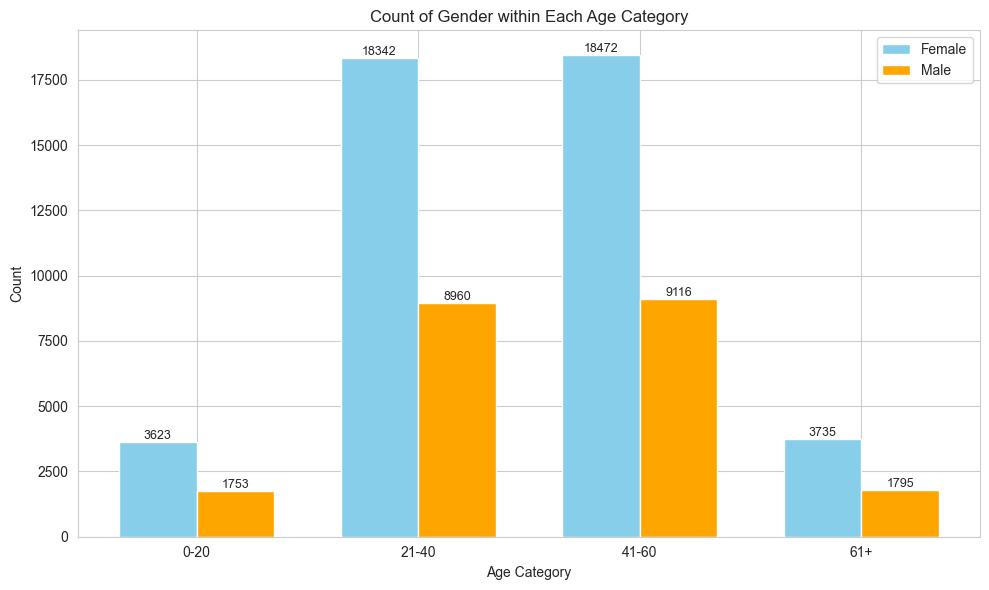

In [179]:

# Resetting the index to use 'Age_Category' as x-axis values
pivot_table_reset = pivot_table.reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = pivot_table_reset.index
bars1 = plt.bar(index, pivot_table_reset['Female'], bar_width, color='skyblue', label='Female')
bars2 = plt.bar(index + bar_width, pivot_table_reset['Male'], bar_width, color='orange', label='Male')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Gender within Each Age Category')
plt.xticks(index + bar_width / 2, pivot_table_reset['Age_Category'])
plt.legend()

# Annotate counts on top of each bar
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), str(int(bar1.get_height())), 
             ha='center', va='bottom', fontsize=9)
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), str(int(bar2.get_height())), 
             ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


#  🚀 Average Time Spent per Gender (Bar Chart):


The average time spent for shopping, regardless of gender or age category, is almost the same, approximately 10 minutes per purchase."

----------------------------------

"Die durchschnittliche Einkaufszeit, unabhängig vom Geschlecht oder der Alterskategorie, ist nahezu gleich und beträgt ungefähr 10 Minuten pro Einkauf."




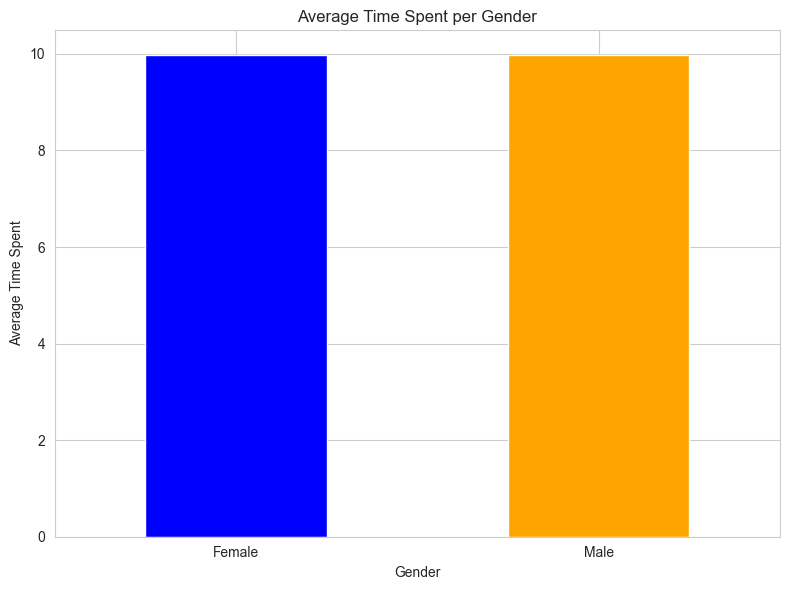

In [180]:
#  average time spent per gender
average_time_spent = df_online_shop.groupby('Gender')['Time_Spent'].mean()

# a bar chart for average time spent per gender
plt.figure(figsize=(8, 6))
average_time_spent.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Average Time Spent')
plt.title('Average Time Spent per Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the bar chart
plt.show()

# Average Time Spent per Gender (Bar Chart):


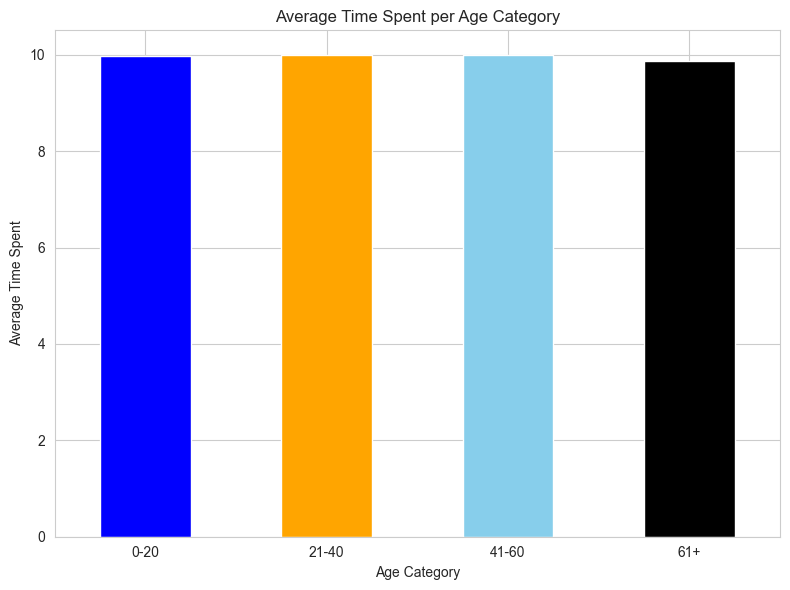

In [181]:
# Calculate average time spent per age category
average_time_spent_age = df_online_shop.groupby('Age_Category', observed=False)['Time_Spent'].mean()

# Create a bar chart for average time spent per age category
plt.figure(figsize=(8, 6))
average_time_spent_age.plot(kind='bar', color=['blue', 'orange', 'skyblue', 'black'])
plt.xlabel('Age Category')
plt.ylabel('Average Time Spent')
plt.title('Average Time Spent per Age Category')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the bar chart
plt.show()


# 🚀 Percentage Distribution of Payment Methods

"30% of customers prefer paying by card, while 29% opt for cash. Approximately 21% choose PayPal, and the remaining 18% use other payment methods."

------------------------------------

"30 % der Kunden bevorzugen die Bezahlung per Karte, während 29 % Bargeld wählen. Etwa 21 % wählen PayPal und die verbleibenden 18 % nutzen andere Zahlungsmethoden."




In [182]:
# 0: cash, 1: Card, 2: PayPal, 3: Others
payment_mapping = {
    0: 'Cash',
    1: 'card',
    2: 'PayPal',
    3: 'Others'
}
# 0: Digitale Geldbörsen, 1: Karte, 2: PayPal, 3: Andere
# 0: Chrome, 1: Safari, 2: Edge, 3: Andere
# Replace numeric values with payment method names using the mapping dictionary
df_online_shop['Pay_Method'] = df_online_shop['Pay_Method'].replace(payment_mapping)

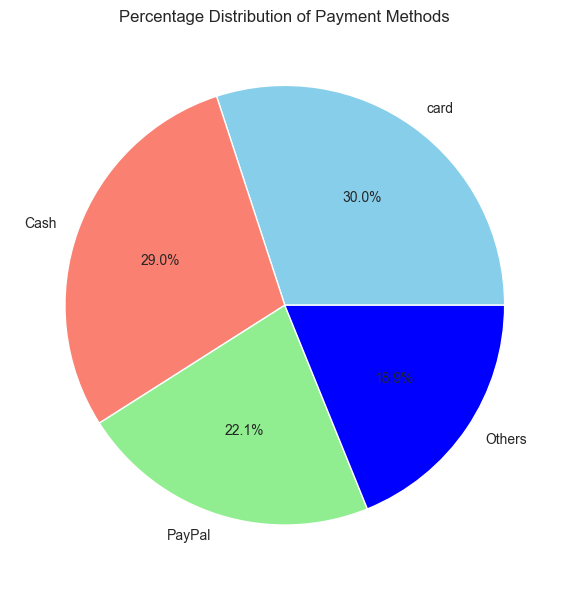

In [183]:
# Calculate percentage distribution of payment methods
payment_method_percentage = df_online_shop['Pay_Method'].value_counts(normalize=True) * 100

# Create a pie chart for percentage distribution of payment methods
plt.figure(figsize=(8, 6))
payment_method_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen','blue'])
plt.title('Percentage Distribution of Payment Methods')
plt.ylabel('')  # Remove the label on the y-axis
plt.tight_layout()

# Show the pie chart
plt.show()


# 🚀 Count of Payment Methods by Gender

In [184]:
pay_chart =df_online_shop.groupby(['Gender','Pay_Method'])['Pay_Method'].size()
pay_chart=pd.DataFrame(pay_chart)
pay_chart.columns = ['Count']
pay_chart

Count
Gender Pay_Method       
Female Cash        12836
       Others       8228
       PayPal       9798
       card        13310
Male   Cash         6239
       Others       4188
       PayPal       4753
       card         6444

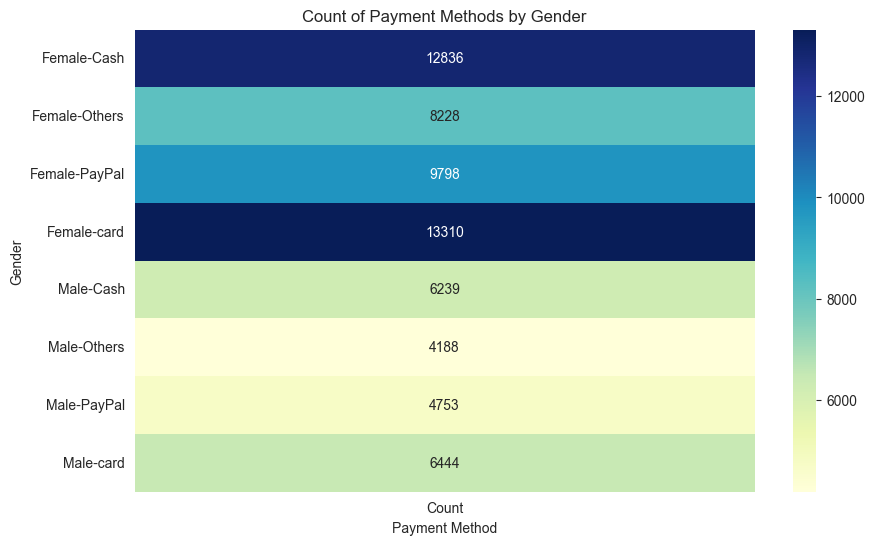

In [185]:
 # Pivot the data to create a matrix for the heatmap

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pay_chart, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Count of Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Gender')
plt.show()

<Figure size 1200x800 with 0 Axes>

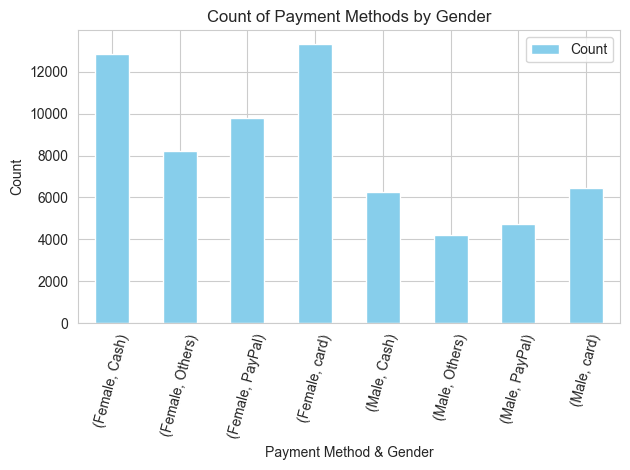

In [186]:



custom_colors = ['skyblue', 'salmon', 'lightgreen', 'blue']  # Add more colors as needed

# Create a bar chart for the counts of each category in 'Pay_Method' using custom colors
plt.figure(figsize=(12, 8))
pay_chart.plot(kind='bar', color=custom_colors)
plt.xlabel('Payment Method & Gender')
plt.ylabel('Count')
plt.title('Count of Payment Methods by Gender')
plt.xticks(rotation=75)
plt.tight_layout()

# Show the bar chart
plt.show()


# 🚀 Payment Methods by age category

In [187]:
pay_chart_1 =df_online_shop.groupby(['Age_Category','Pay_Method'])['Pay_Method'].size()
pay_chart_1=pd.DataFrame(pay_chart_1)
pay_chart_1.columns = ['Count']
pay_chart_1

/var/folders/bl/w0h35lbx7mg6mytwcqplynj80000gn/T/ipykernel_4071/2885544237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pay_chart_1 =df_online_shop.groupby(['Age_Category','Pay_Method'])['Pay_Method'].size()


Count
Age_Category Pay_Method       
0-20         Cash         1584
             Others       1046
             PayPal       1180
             card         1566
21-40        Cash         7937
             Others       5149
             PayPal       5972
             card         8244
41-60        Cash         7932
             Others       5167
             PayPal       6164
             card         8325
61+          Cash         1622
             Others       1054
             PayPal       1235
             card         1619

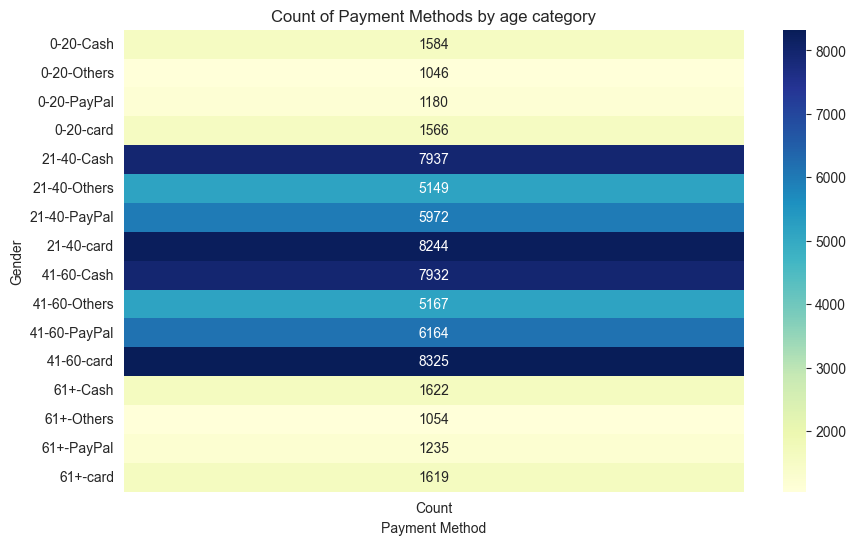

In [188]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pay_chart_1, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Count of Payment Methods by age category')
plt.xlabel('Payment Method')
plt.ylabel('Gender')
plt.show()

# 🏁 Analysis of the number of purchases made by customers (N_Purchases) to understand buying patterns and frequency.
Examination of purchase values (Purchase_VALUE) to determine average spending, high-value customers, or popular price points.
Revenue Analysis:

The purchase data shows that the majority of transactions fall within lower price ranges, with €0-10 purchases being the most frequent, followed by €10-20 and €20-30 transactions. As the price range increases beyond €30, the number of purchases notably decreases, indicating fewer transactions for higher-priced items."


"Die Kaufdaten zeigen, dass die Mehrheit der Transaktionen in niedrigeren Preiskategorien liegt, wobei Käufe im Bereich von €0-10 am häufigsten sind, gefolgt von €10-20 und €20-30 Transaktionen. Mit steigenden Preisen über €30 nimmt die Anzahl der Käufe deutlich ab, was auf weniger Transaktionen für höherpreisige Artikel hinweist.

In [189]:
df_online_shop.N_Purchases.unique()
#cat N_Purchases  & N_Purchases

array([2, 3, 1, 5, 6, 7, 4])

In [190]:
df_online_shop.Purchase_VALUE.unique().min()
df_online_shop.Purchase_VALUE.unique().max()


59.9

In [205]:
#  the bins or categories for purchase values
value_bins = [0, 10, 20, 30, 40, 50, 60, 70]  # Define price ranges (adjust as needed)
labels = ['€0-10', '€10-20', '€20-30', '€30-40', '€40-50', '€50-60', '€60+']  # Labels for the price ranges with Euro symbol

# Categorize purchase values into specified bins
df_online_shop['Price_Category'] = pd.cut(df_online_shop['Purchase_VALUE'], bins=value_bins, labels=labels)


In [206]:
df_online_shop['Price_Category'].value_counts()

Price_Category
€0-10     28105
€10-20    15684
€20-30    10911
€30-40     7640
€40-50     2219
€50-60     1237
€60+          0
Name: count, dtype: int64

# 🏁  # visualize the counts of each category in the 'Purchases_Category'

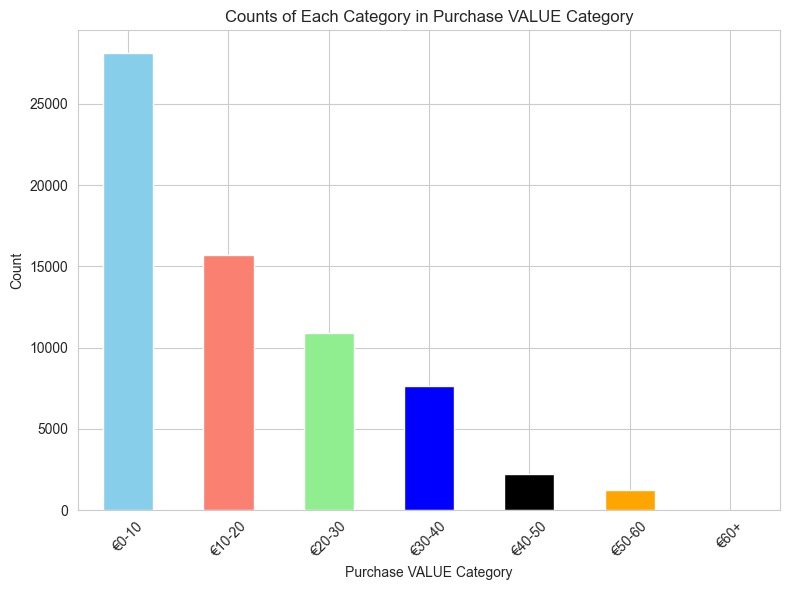

In [207]:

#  the occurrences of each category in 'Price_Category'
price_category_counts = df_online_shop['Price_Category'].value_counts()

# Define custom colors matching the number of unique categories
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'blue', 'black', 'orange']  # Adjust the number of colors as needed

# Create a bar chart for the counts of each category in 'Price_Category' using custom colors
plt.figure(figsize=(8, 6))
price_category_counts.plot(kind='bar', color=custom_colors)
plt.xlabel('Purchase VALUE Category')
plt.ylabel('Count')
plt.title('Counts of Each Category in Purchase VALUE Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


<Figure size 2000x1500 with 0 Axes>

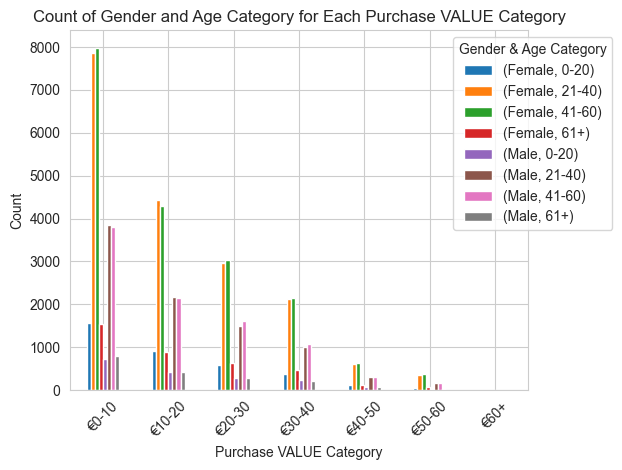

In [208]:

sns.set_style('whitegrid')  

#  a pivot table to count occurrences of Gender and Age_Category for each Price_Category
pivot_table = df_online_shop.pivot_table(index='Price_Category', columns=['Gender', 'Age_Category'], aggfunc='size', fill_value=0)

# Plotting a grouped bar chart
plt.figure(figsize=(20, 15))
pivot_table.plot(kind='bar', stacked=False)
plt.xlabel('Purchase VALUE Category')
plt.ylabel('Count')
plt.title('Count of Gender and Age Category for Each Purchase VALUE Category')
plt.legend(title='Gender & Age Category', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the grouped bar chart
plt.show()


# 🚀 purchase Categories by Day of Week

The data illustrates the distribution of purchases across various price categories throughout the week. Across most days, the €0-10 price range sees consistent activity, with Friday, Saturday, and Sunday notably displaying higher volumes. As prices increase beyond €30, the number of purchases decreases notably across all weekdays, indicating a preference for lower-priced items during the week, with weekends showing slightly higher engagement across multiple price brackets.
--------------
Die Daten veranschaulichen die Verteilung von Einkäufen in verschiedenen Preiskategorien über die Woche hinweg. An den meisten Tagen zeigt die Preisspanne von €0-10 eine kontinuierliche Aktivität, wobei besonders Freitag, Samstag und Sonntag eine höhere Anzahl aufweisen. Mit steigenden Preisen über €30 nimmt die Anzahl der Käufe an allen Wochentagen deutlich ab, was darauf hinweist, dass unter der Woche eine Vorliebe für günstigere Artikel besteht, während an Wochenenden in mehreren Preisbereichen etwas mehr Aktivität zu verzeichnen ist.

In [195]:


def get_day(date1):
    # Assuming 'date1' is a DataFrame column containing datetime values
    date1 = pd.to_datetime(date1)
    x = date1.dt.day_name()
    return x
df_online_shop['Day_of_Week'] = get_day(df_online_shop['Purchase_DATE'])


In [209]:
amount_of_sales_per_day =df_online_shop.groupby(['Day_of_Week','Price_Category'])['Price_Category'].size()
amount_of_sales_per_day =pd.DataFrame(amount_of_sales_per_day)

/var/folders/bl/w0h35lbx7mg6mytwcqplynj80000gn/T/ipykernel_4071/1242644678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_of_sales_per_day =df_online_shop.groupby(['Day_of_Week','Price_Category'])['Price_Category'].size()


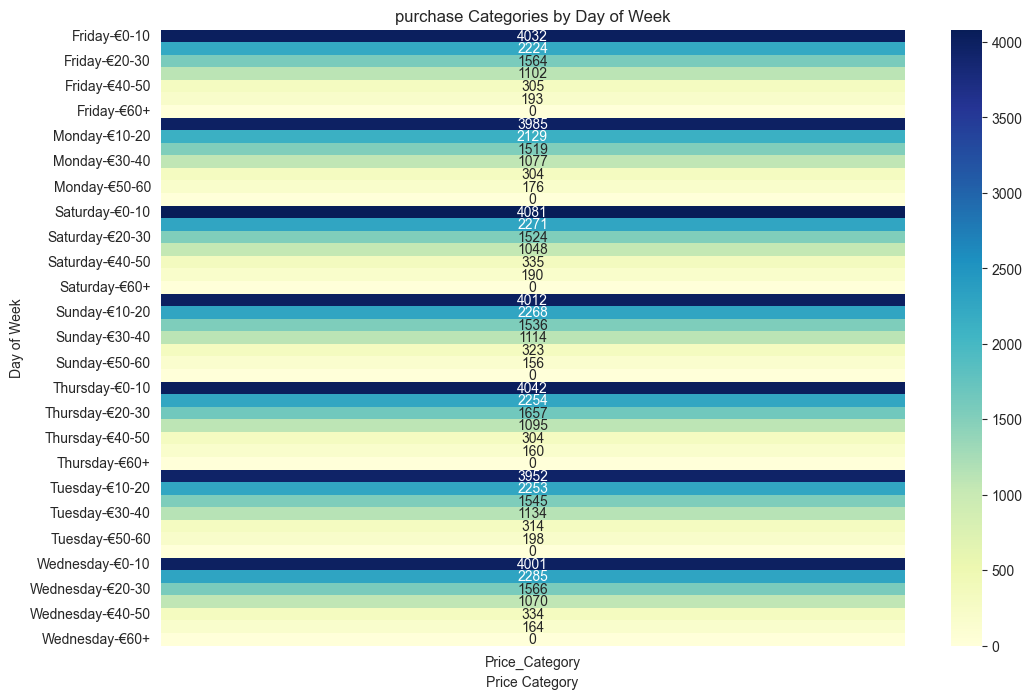

In [210]:


# 'amount_of_sales_per_day' is a DataFrame containing the provided data structure

plt.figure(figsize=(12, 8))
sns.heatmap(amount_of_sales_per_day, cmap='YlGnBu', annot=True, fmt='d')
plt.title('purchase Categories by Day of Week')
plt.xlabel('Price Category')
plt.ylabel('Day of Week')
plt.show()


# 🏁 # Evaluation of total revenue generated (Revenue_Total) to assess the overall financial performance.
Time Analysis:
# 

The data for 2021 indicates consistent quarterly revenue trends based on Purchase_DATE, displaying stable sales performance throughout the year. However, the available data for 2022 is limited, providing insights for just a single day, showing a substantially lower revenue figure compared to the previous quarters. As a result, it's challenging to draw conclusive insights or trends for 2022 due to the dataset's limitation, warranting further observation as more data becomes available."

----------------------------
"Die Daten für 2021 zeigen konsistente vierteljährliche Umsatztrends basierend auf dem Kaufdatum und weisen auf eine stabile Umsatzleistung im Laufe des Jahres hin. Die verfügbaren Daten für 2022 sind jedoch begrenzt und bieten Einblicke für nur einen einzigen Tag, was eine deutlich geringere Umsatzfigur im Vergleich zu den vorherigen Quartalen zeigt. Daher ist es aufgrund der begrenzten Datengrundlage herausfordernd, definitive Erkenntnisse oder Trends für 2022 abzuleiten. Es bedarf weiterer Beobachtung, sobald mehr Daten verfügbar sind.

In [198]:

df_online_shop['Purchase_DATE'] = pd.to_datetime(df_online_shop['Purchase_DATE'], format='%Y-%m-%d')


In [199]:

# Convert 'Purchase_DATE' column to datetime if not already done
df_online_shop['Purchase_DATE'] = pd.to_datetime(df_online_shop['Purchase_DATE'])




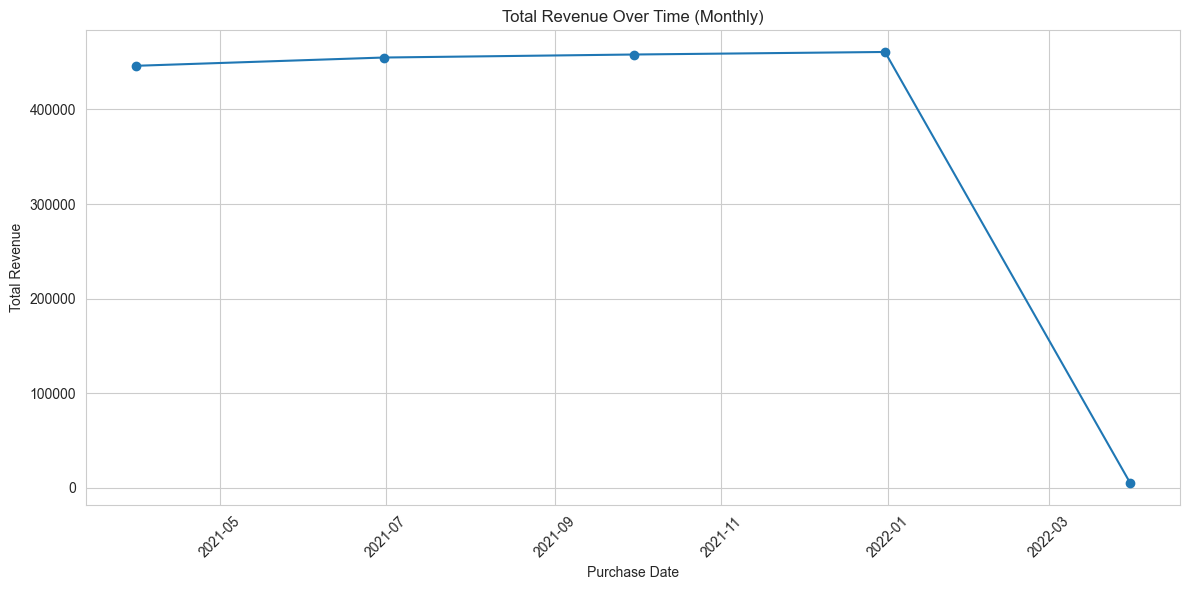

In [200]:
#  'Purchase_DATE' as the DataFrame index
df_online_shop.set_index('Purchase_DATE', inplace=True)

# Resample the data by month and calculate the total revenue for each month
revenue_over_time = df_online_shop['Revenue_Total'].resample('Q').sum()

# Plotting a time series chart for total revenue over time (monthly)
plt.figure(figsize=(12, 6))
plt.plot(revenue_over_time.index, revenue_over_time.values, marker='o', linestyle='-')
plt.xlabel('Purchase Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the time series chart
plt.show()

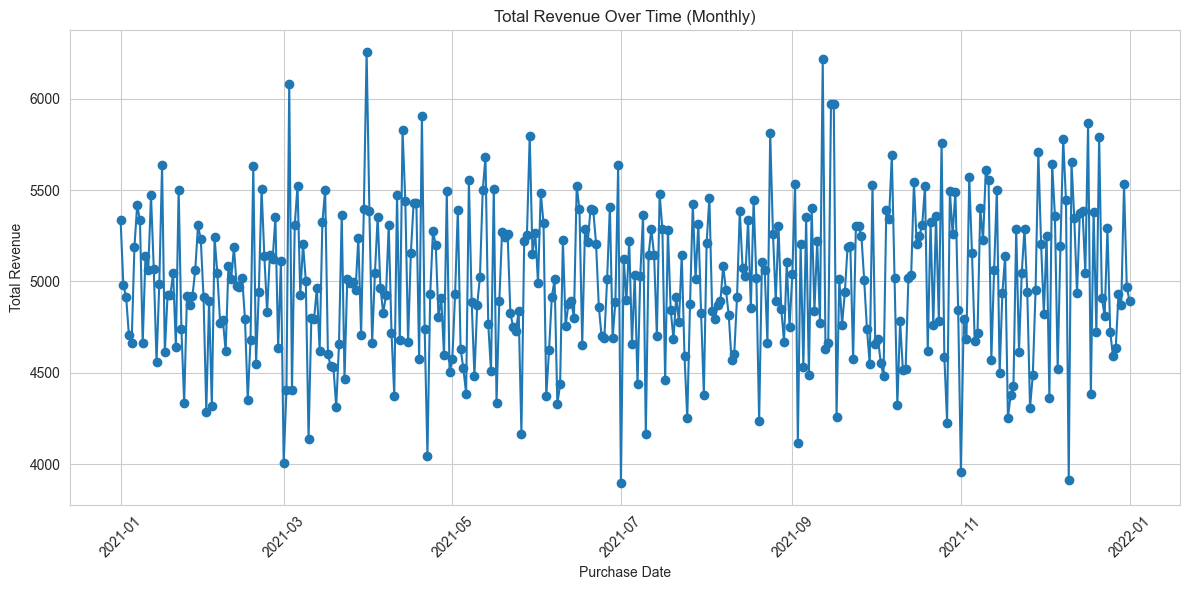

In [215]:
# Set 'Purchase_DATE' as the DataFrame index
#df_online_shop.set_index('Purchase_DATE', inplace=True)

# Resample the data by month and calculate the total revenue for each month
revenue_over_time = df_online_shop['Revenue_Total'].resample('D').sum()

# Plotting a time series chart for total revenue over time (monthly)
plt.figure(figsize=(12, 6))
plt.plot(revenue_over_time.index, revenue_over_time.values, marker='o', linestyle='-')
plt.xlabel('Purchase Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the time series chart
plt.show()



# 🏁  Analyzing newsletter subscriptions (Newsletter) and voucher usage (Voucher) to evaluate marketing strategies or customer engagement initiatives.
Temporal Analysis:

The provided data represents the distribution or percentage breakdown of subscribers to a newsletter:

No: Approximately 84.9%
Yes: Approximately 15.1%
This data indicates that a majority of individuals, nearly 85%, are not subscribed to the newsletter, while about 15% have opted for newsletter subscription.
----------
Die bereitgestellten Daten zeigen die Verteilung oder prozentuale Aufschlüsselung der Abonnenten eines Newsletters:

Nein: Ungefähr 84,9%
Ja: Ungefähr 15,1%
Diese Daten zeigen, dass die Mehrheit der Personen, fast 85%, nicht für den Newsletter abonniert ist, während etwa 15% sich für ein Newsletter-Abonnement entschieden haben.



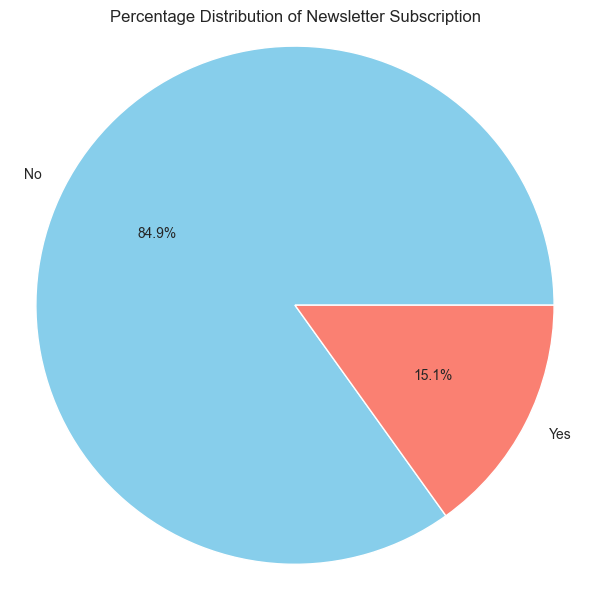

In [203]:

# Replacing values 0 and 1 with 'No' and 'Yes' in 'Newsletter' column
df_online_shop['Newsletter'] = df_online_shop['Newsletter'].map({0: 'No', 1: 'Yes'})

# Calculate percentage distribution of 'Newsletter' column
newsletter_percentage = df_online_shop['Newsletter'].value_counts(normalize=True) * 100

# Create a pie chart for the percentage distribution
plt.figure(figsize=(6, 6))
plt.pie(newsletter_percentage, labels=newsletter_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Percentage Distribution of Newsletter Subscription')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Show the pie chart
plt.show()


# 🏁 Examination of browsers used by customers (Browser) to optimize web experiences or identify compatibility issues.
Subscription and Voucher Usage:

The provided data represents the distribution or percentage breakdown of users based on their web browsers:

Chrome: Approximately 64%
Safari: Approximately 20%
Other: Approximately 11%
This data indicates that the majority of users, nearly 64%, are utilizing Chrome as their web browser, followed by Safari users at around 20%. The remaining 11% are using other unspecified browsers.

In [211]:
# #0: Chrome, 1: Safari, 2: Edge, 3: Other
#  a dictionary to map browser codes to browser names
browser_mapping = {0: 'Chrome', 1: 'Safari', 2: 'Edge', 3: 'Other'}

# Map the 'Browser' column using the defined dictionary
df_online_shop['Browser'] = df_online_shop['Browser'].map(browser_mapping)


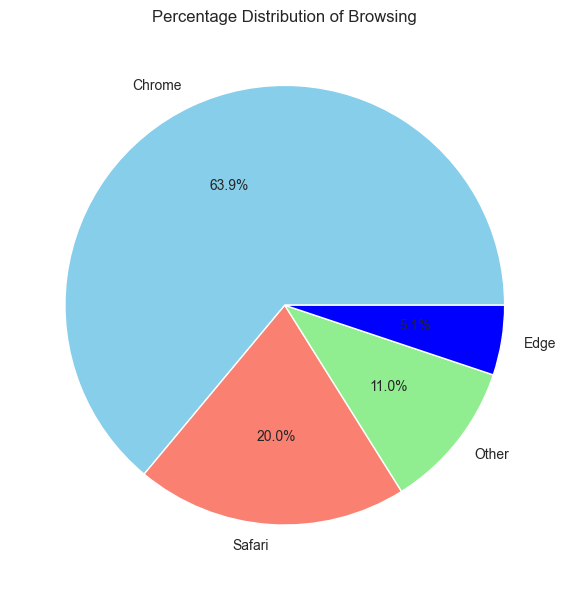

In [212]:
# Calculate percentage distribution of payment methods
Browser_precentage = df_online_shop['Browser'].value_counts(normalize=True) * 100

# Create a pie chart for percentage distribution of payment methods
plt.figure(figsize=(8, 6))
Browser_precentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen','blue'])
plt.title('Percentage Distribution of Browsing')
plt.ylabel('')  # Remove the label on the y-axis
plt.tight_layout()

# Show the pie chart
plt.show()
